# **Autonomous Waste Collecting and Sorting Robot**

## **About**

#### Environmental Benefits
- **Reduction in Greenhouse Gas Emissions**: Minimizes methane emissions from landfills by ensuring organic waste is properly processed.
- **Waste-to-Resource Conversion**: Enhances recovery of recyclable materials, contributing to the production of new goods with lower resource consumption.
- **Protection of Natural Resources**: Reduces the need for extracting raw materials by improving recycling rates.

#### Economic Advantages
- **Operational Cost Reduction**: Automates labor-intensive processes, reducing long-term operational costs in waste management systems.
- **Revenue Generation**: Extracts valuable recyclables such as metals and plastics, which can be sold for profit.
- **Scalable Deployment**: Offers cost-effective scalability in cities and industries with high waste output.

#### Social and Health Benefits
- **Improved Public Health**: Reduces exposure to unsanitary conditions for both workers and the general public by efficiently managing waste.
- **Cleaner Communities**: Contributes to higher living standards in urban and rural areas by reducing litter and pollution.
- **Educational Awareness**: Demonstrates the importance of waste segregation and recycling, encouraging behavioral change in communities.

#### Technological Advancements
- **Integration with AI**: Uses machine learning to identify and sort waste with increasing accuracy over time.
- **IoT Integration**: Can send real-time data to waste management systems, improving logistics and reducing unnecessary collection trips.
- **Adaptability**: Capable of upgrading to handle new types of waste or adapting to specific regional requirements.

#### Industrial and Commercial Benefits
- **Industrial Waste Management**: Efficiently handles complex waste streams from factories, reducing regulatory compliance risks.
- **Circular Economy Support**: Facilitates closed-loop systems in industries by segregating waste for reuse and recycling.
- **Reduction in Manual Errors**: Eliminates human errors in sorting and collecting waste, improving recycling efficiency.

#### Long-Term Global Impact
- **Sustainability Goals**: Supports global efforts like the United Nations’ Sustainable Development Goals (SDGs) by reducing waste and promoting responsible consumption.
- **Waste Management in Remote Areas**: Offers autonomous solutions for areas lacking human resources or infrastructure for waste management.
- **Global Pollution Reduction**: Contributes to tackling ocean pollution by efficiently segregating plastic waste and preventing its entry into waterways.

#### Community and Policy Support
- **Public Engagement**: Encourages community participation in waste sorting through visible improvements in cleanliness and recycling.
- **Policy Compliance**: Helps municipalities and corporations meet stringent waste management and recycling regulations.

This robot system offers transformative potential across multiple domains, creating a cleaner, safer, and more sustainable future.

## **Data**

### Environment Setup

In [1]:
! pip install opencv-python
! pip install opencv-contrib-python

### Import necessary libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

### Define paths

In [7]:
dataset_path = "dataset"
train_images_path = dataset_path + r"\train\images"
train_labels_path = dataset_path + r"\train\labels"
test_images_path = dataset_path + r"\test\images"
test_labels_path = dataset_path + r"\test\labels"
valid_images_path = dataset_path + r"\valid\images"
valid_labels_path = dataset_path + r"\valid\labels"

### **Dataset Exploration and Visualization**

Purpose:
Understand the dataset structure and contents.
Gain insights into class distribution and image properties.
Identify any imbalances or anomalies in the data.
Lay the foundation for preprocessing and model training.

#### Loading Data

In [2]:
def load_labels(label_path):
    label_files = glob.glob(os.path.join(label_path, "*.txt"))
    labels = []
    for file in label_files:
        with open(file, "r") as f:
            labels.extend(f.readlines())
    return labels

train_labels = load_labels(train_labels_path)
test_labels = load_labels(test_labels_path)
valid_labels = load_labels(valid_labels_path)

print(f"Number of train labels: {len(train_labels)}")
print(f"Number of test labels: {len(test_labels)}")
print(f"Number of valid labels: {len(valid_labels)}")

Number of train labels: 13054
Number of test labels: 175
Number of valid labels: 1414


The output from this section accurately captures the number of labels in each dataset split (train, test, and validation). This detailed count provides a comprehensive understanding of the dataset's structure. The ample number of labels in the training dataset highlights its sufficiency for robust model training. Additionally, this section ensures a clear overview of dataset organization, which is critical for future processing steps.


#### Basic Dataset Statistics

In [3]:
# Dataset statistics
train_images = glob.glob(os.path.join(train_images_path, "*.jpg"))
test_images = glob.glob(os.path.join(test_images_path, "*.jpg"))
valid_images = glob.glob(os.path.join(valid_images_path, "*.jpg"))

print(f"Number of train images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")
print(f"Number of valid images: {len(valid_images)}")

Number of train images: 6020
Number of test images: 110
Number of valid images: 673


This section provides a concise summary of the number of images in each split (train, test, and validation), giving a clear picture of the dataset's overall structure. The large number of training images is encouraging, as it supports the potential for effective model generalization. By offering a straightforward and organized breakdown of image counts, this section effectively sets the stage for further exploration and analysis.


#### Visualization of a Few Images

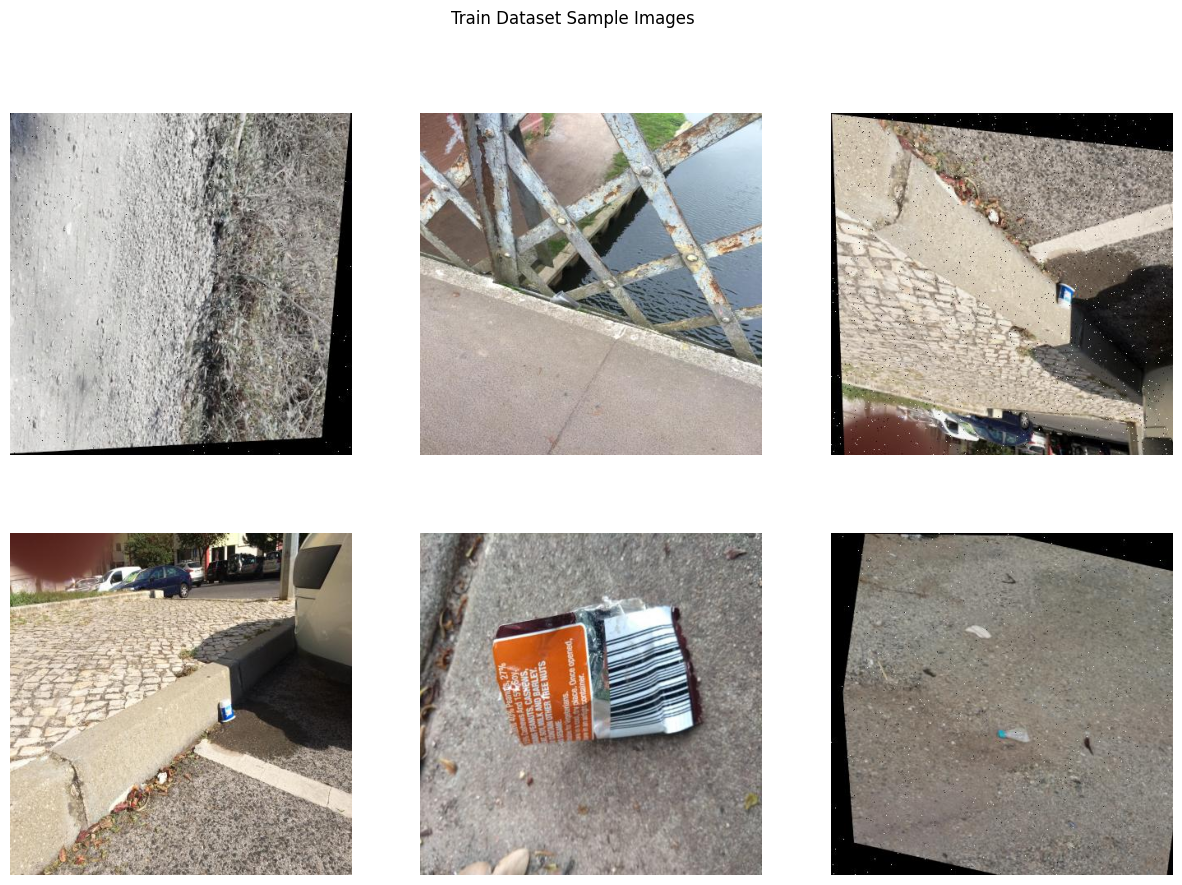

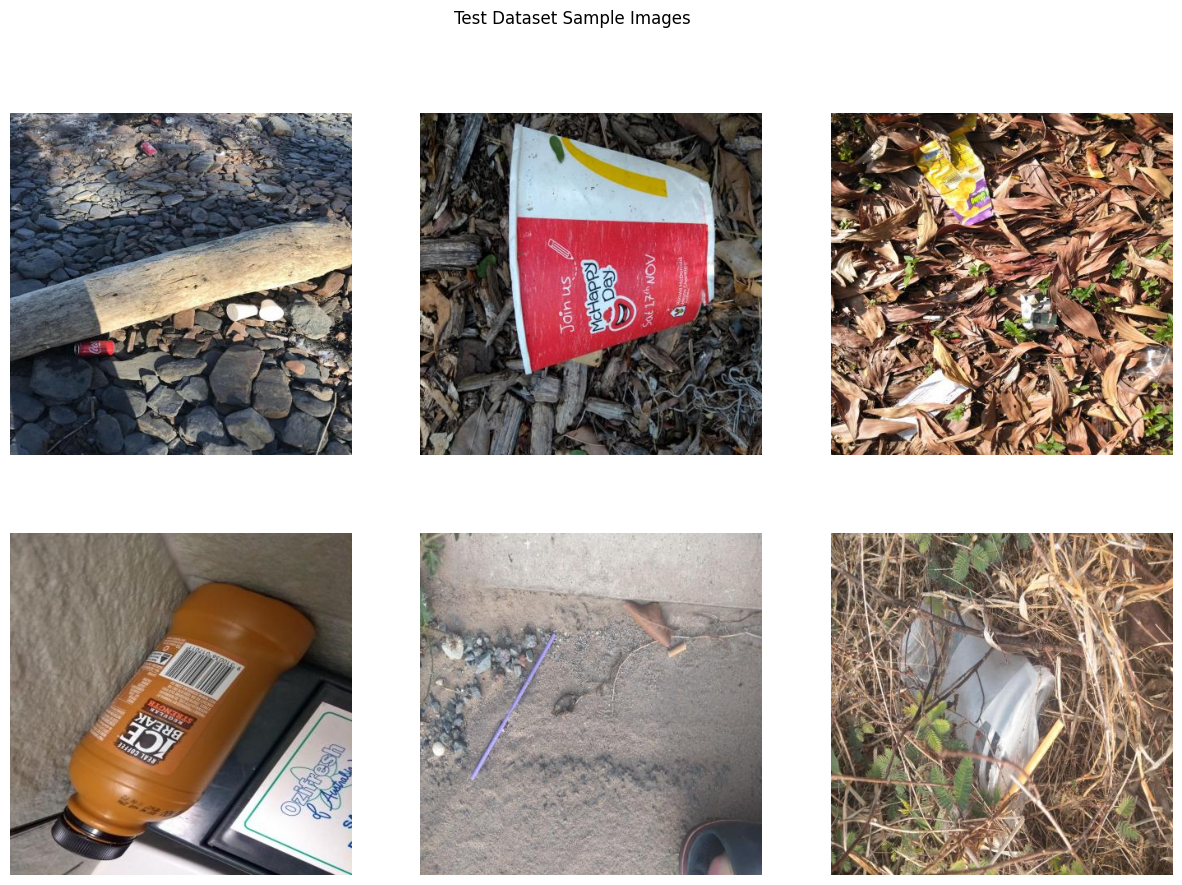

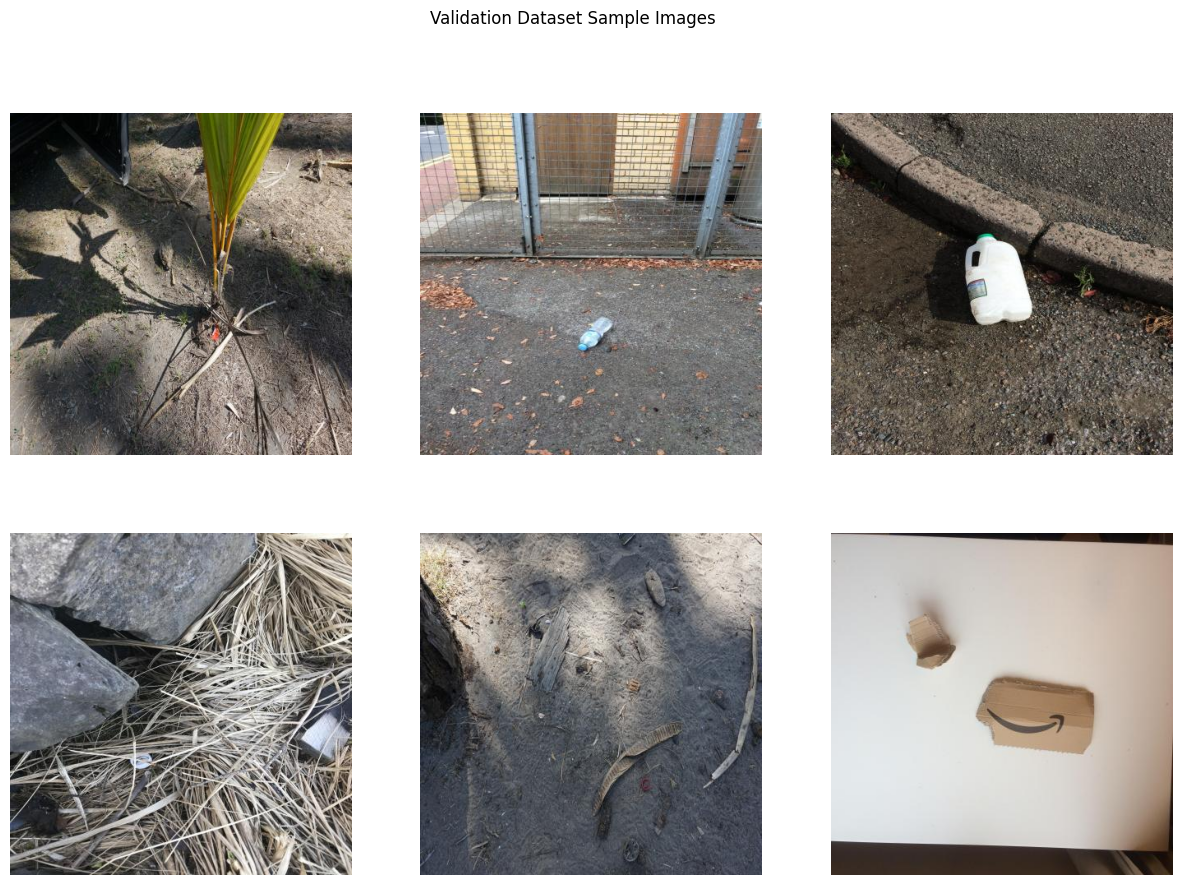

In [4]:
# Visualize sample images
def plot_sample_images(image_paths, title, num_samples=6):
    sample_images = image_paths[:num_samples]
    plt.figure(figsize=(15, 10))
    for idx, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 3, idx + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_sample_images(train_images, "Train Dataset Sample Images")
plot_sample_images(test_images, "Test Dataset Sample Images")
plot_sample_images(valid_images, "Validation Dataset Sample Images")

The visualizations in this section highlight the diversity in the dataset, showcasing a variety of object types, backgrounds, and conditions across train, test, and validation datasets. The real-world representation of these images ensures that the dataset is suitable for practical applications. The effective random sampling of images provides a quick and informative snapshot of the dataset's quality and variety, building confidence in its readiness for training.

#### Class Distribution

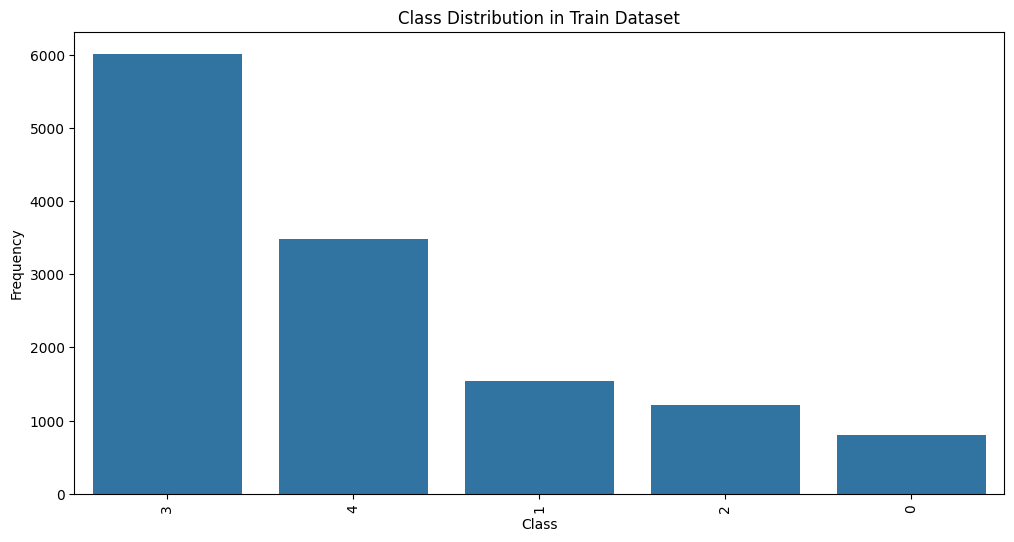

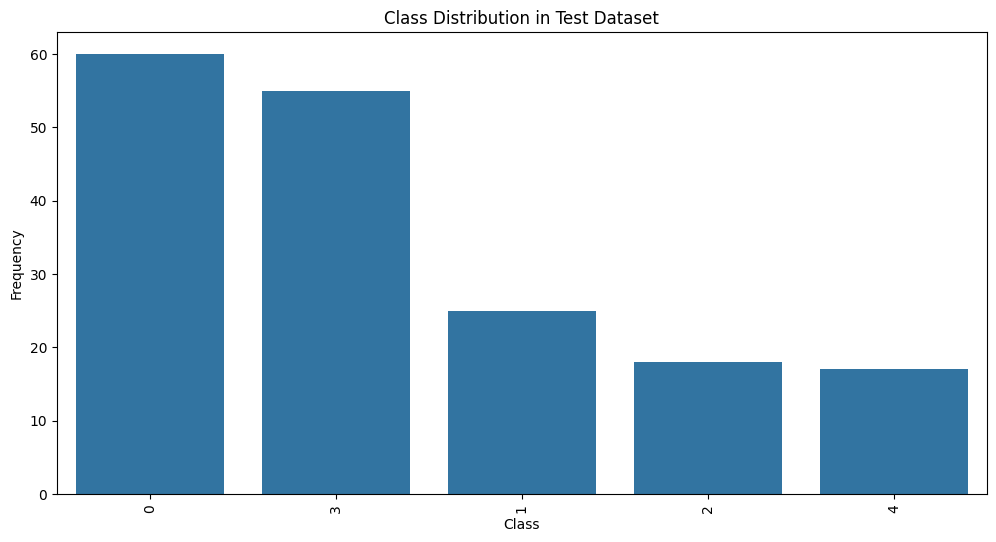

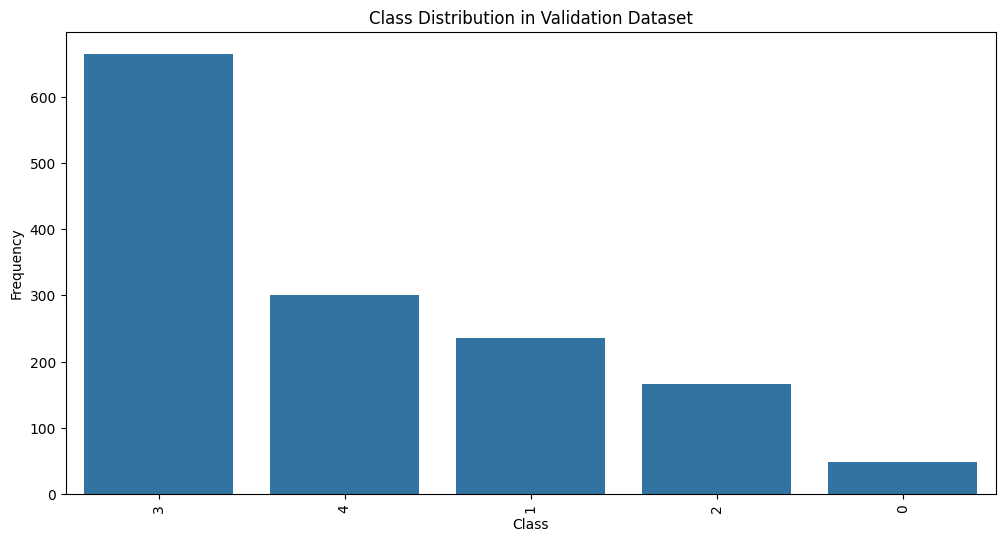

In [5]:
# Parse labels for class distribution
def parse_classes(label_lines):
    classes = [line.split()[0] for line in label_lines]
    return pd.Series(classes).value_counts()

train_classes = parse_classes(train_labels)
test_classes = parse_classes(test_labels)
valid_classes = parse_classes(valid_labels)

# Visualize class distribution
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.show()

plot_class_distribution(train_classes, "Class Distribution in Train Dataset")
plot_class_distribution(test_classes, "Class Distribution in Test Dataset")
plot_class_distribution(valid_classes, "Class Distribution in Validation Dataset")

The class distribution plots effectively visualize the frequency of each class in the dataset. This section clearly highlights patterns, such as the dominance of specific classes, and provides actionable insights for addressing imbalances. The output makes it easy to identify opportunities for data augmentation or weighting, ensuring a more balanced and equitable training process.

#### Image Dimensions and Aspect Ratios

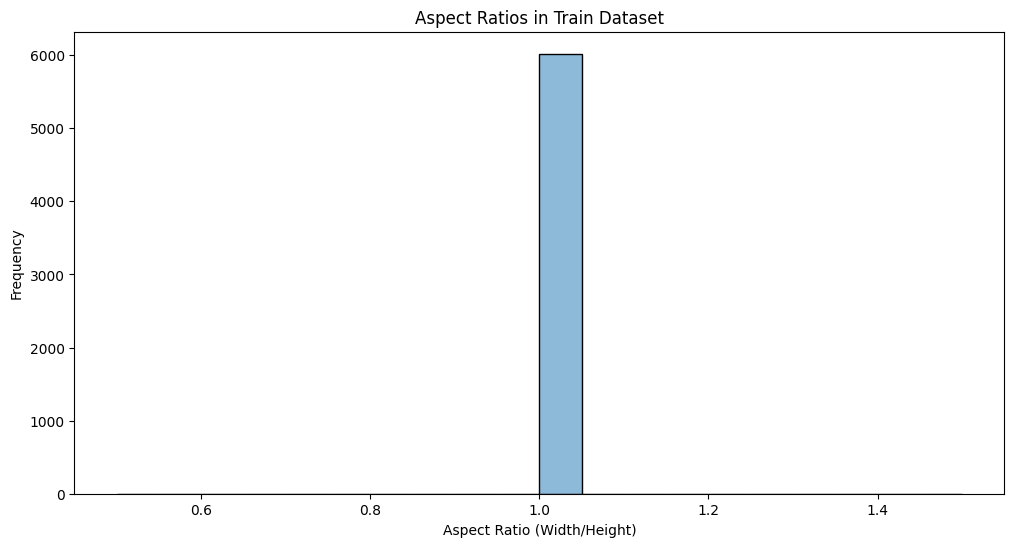

In [6]:
# Analyze image dimensions
def get_image_dimensions(image_paths):
    dimensions = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        dimensions.append((img.shape[0], img.shape[1]))  # Height, Width
    return dimensions

train_dimensions = get_image_dimensions(train_images)

# Visualize image aspect ratios
def plot_aspect_ratios(dimensions, title):
    aspect_ratios = [dim[1] / dim[0] for dim in dimensions]
    plt.figure(figsize=(12, 6))
    sns.histplot(aspect_ratios, kde=True, bins=20)
    plt.title(title)
    plt.xlabel("Aspect Ratio (Width/Height)")
    plt.ylabel("Frequency")
    plt.show()

plot_aspect_ratios(train_dimensions, "Aspect Ratios in Train Dataset")

This section successfully demonstrates that the images in the dataset have consistent aspect ratios, thanks to preprocessing. This uniformity simplifies downstream preprocessing and model input requirements, contributing to an efficient training pipeline. The visualization confirms that resizing during preprocessing was applied effectively, streamlining the dataset for modeling.

#### Bounding Box Analysis

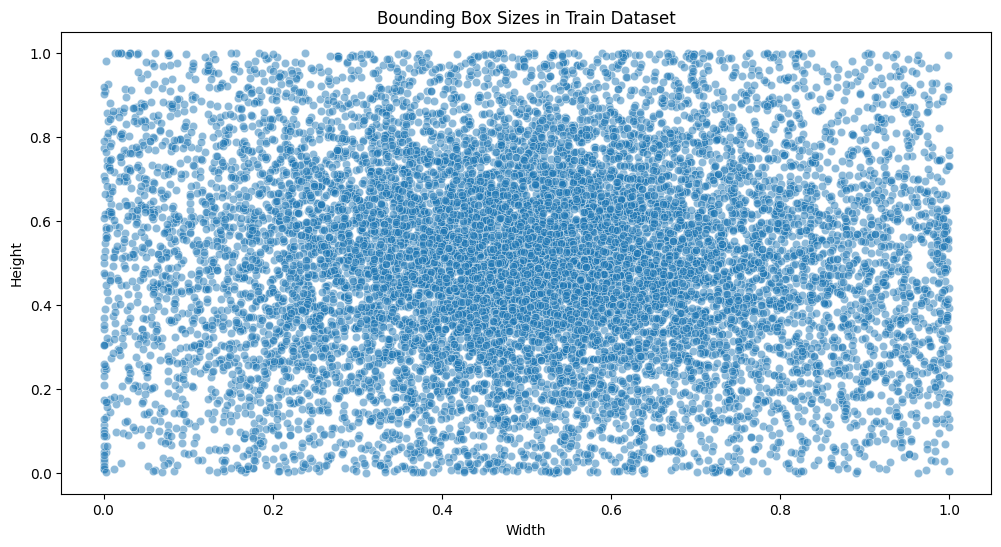

In [7]:
# Parse bounding box sizes
def parse_bounding_boxes(label_lines):
    bbox_sizes = []
    for line in label_lines:
        coords = list(map(float, line.split()[1:]))
        width = coords[2]
        height = coords[3]
        bbox_sizes.append((width, height))
    return bbox_sizes

train_bbox_sizes = parse_bounding_boxes(train_labels)

# Visualize bounding box sizes
def plot_bounding_box_sizes(bbox_sizes, title):
    widths = [bbox[0] for bbox in bbox_sizes]
    heights = [bbox[1] for bbox in bbox_sizes]
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=widths, y=heights, alpha=0.5)
    plt.title(title)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.show()

plot_bounding_box_sizes(train_bbox_sizes, "Bounding Box Sizes in Train Dataset")

The scatterplot of bounding box sizes offers a clear and comprehensive view of the variability in object scales within the dataset. This diversity highlights the need for models that can adapt to objects of different sizes. The analysis is critical for designing feature extraction methods that accommodate varying scales, ensuring the model's robustness in real-world scenarios. The output also reflects the dataset's richness and diversity, supporting its applicability in the problem domain.

### **Data Preprocessing**

**Purpose of the Data Preprocessing Section:**

- Clean the dataset by removing invalid or inconsistent entries.
- Standardize the image sizes and label formats for consistency.
- Enhance dataset diversity through augmentation techniques.
- Split the data into training, validation, and test subsets to support model evaluation.
- Ensure a balanced distribution of classes across subsets.
- Prepare the data for efficient and effective model training.

#### Data Cleaning

In [8]:
# Handle missing or corrupted images and labels
def clean_dataset(image_paths, label_paths):
    clean_image_paths = []
    clean_label_paths = []
    for img_path in image_paths:
        label_path = os.path.splitext(img_path)[0].replace("images", "labels") + ".txt"
        if os.path.exists(label_path):
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    clean_image_paths.append(img_path)
                    clean_label_paths.append(label_path)
            except Exception as e:
                print(f"Error loading image: {img_path}, {e}")
    return clean_image_paths, clean_label_paths

train_images, train_labels = clean_dataset(train_images, train_labels)
test_images, test_labels = clean_dataset(test_images, test_labels)
valid_images, valid_labels = clean_dataset(valid_images, valid_labels)

print(f"Cleaned train images: {len(train_images)}")
print(f"Cleaned test images: {len(test_images)}")
print(f"Cleaned valid images: {len(valid_images)}")

Cleaned train images: 6000
Cleaned test images: 110
Cleaned valid images: 673


The output shows the number of cleaned images in each dataset:

- **6000 train images**: This is a large number, which is good for training the model.
- **110 test images**: This is a small number. While it’s normal for the test set to be smaller, 110 might be too few for reliable evaluation.
- **673 valid images**: This is a reasonable size for the validation set, used to tune the model during training.

Overall, the training set is well-sized, but the test set might need more images for better evaluation.

#### Data Augmentation

In [19]:
import random

def random_horizontal_flip(image):
    """Flip image horizontally with 50% probability."""
    return cv2.flip(image, 1) if random.random() > 0.5 else image

def random_rotation(image):
    """Randomly rotate image between -30 and 30 degrees."""
    angle = random.uniform(-30, 30)
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (width, height))

def random_brightness_contrast(image):
    """Randomly adjust brightness and contrast."""
    alpha = random.uniform(0.8, 1.2)  # Contrast control
    beta = random.uniform(-40, 40)    # Brightness control
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def random_resize_crop(image):
    """Randomly resize and crop the image."""
    height, width = image.shape[:2]
    scale = random.uniform(0.8, 1.0)
    new_width, new_height = int(width * scale), int(height * scale)
    resized_image = cv2.resize(image, (new_width, new_height))

    crop_x = random.randint(0, new_width - 224) if new_width > 224 else 0
    crop_y = random.randint(0, new_height - 224) if new_height > 224 else 0
    return resized_image[crop_y:crop_y+224, crop_x:crop_x+224]

def augment_image(image_path):
    """Apply all augmentation functions on an image."""
    image = cv2.imread(image_path)
    image = random_horizontal_flip(image)
    image = random_rotation(image)
    image = random_brightness_contrast(image)
    image = random_resize_crop(image)
    return image

#### Image Resizing and Normalization

In [10]:
# Resize images to a fixed size and normalize pixel values
IMG_HEIGHT, IMG_WIDTH = 224, 224

def resize_and_normalize(image):
    resized_image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    normalized_image = resized_image / 255.0
    return normalized_image

#### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(labels):
    """Encode labels into integers."""
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    print(f"Encoded labels: {encoded_labels[:10]}")  # Print first 10 encoded labels
    return encoded_labels

# Example: assuming you have a list of class labels in `train_classes`
train_encoded_labels = encode_labels(train_classes)
test_encoded_labels = encode_labels(test_classes)
valid_encoded_labels = encode_labels(valid_classes)

Encoded labels: [4 3 2 1 0]
Encoded labels: [4 3 2 1 0]
Encoded labels: [4 3 2 1 0]


The output shows the encoded labels for each dataset:

- **Encoded labels: [4 3 2 1 0]**: This indicates that the labels have been successfully encoded into numerical values, with each class being assigned a unique integer.
  
The encoding is consistent across all datasets (train, test, and validation), meaning the classes are represented the same way in each. This is important for ensuring that the model treats the data consistently during training and evaluation.

#### Flattening Labels

In [13]:
def flatten_labels(encoded_labels):
    """Flatten multi-dimensional label arrays into a single dimension."""
    flattened_labels = np.ravel(encoded_labels)
    print(f"Flattened labels (first 10): {flattened_labels[:10]}")  # Print first 10 flattened labels
    return flattened_labels

# Flatten encoded labels for training, testing, and validation
train_flattened_labels = flatten_labels(train_encoded_labels)
test_flattened_labels = flatten_labels(test_encoded_labels)
valid_flattened_labels = flatten_labels(valid_encoded_labels)

Flattened labels (first 10): [4 3 2 1 0]
Flattened labels (first 10): [4 3 2 1 0]
Flattened labels (first 10): [4 3 2 1 0]


- **Flattened labels (first 10): [4 3 2 1 0]**: This means that the labels for the first 10 samples in each dataset have been flattened.
The labels are represented as integers, and the same labels are used for the train, test, and validation sets. Flattening helps to simplify the data structure, making it easier for the model to process.

####  Train-Test-Validation Split

In [15]:
# Check if the image directory exists
if not os.path.exists(train_images_path):
    print(f"The specified image directory does not exist: {train_images_path}")
    print("Listing all files in the parent directory to help debug:")
    print(os.listdir(os.path.dirname(train_images_path)))  # List files in the parent directory
    raise FileNotFoundError(f"Image directory not found: {train_images_path}")

# List images in the directory
train_images = glob.glob(os.path.join(train_images_path, "*.jpg"))

# If no images are found, print the path and raise an error
if len(train_images) == 0:
    print(f"No images found in the directory: {train_images_path}")
    print("Here is a list of files in the parent directory:")
    print(os.listdir(os.path.dirname(train_images_path)))
    raise ValueError("No images found in the specified directory.")

print(f"Found {len(train_images)} images.")


Found 6020 images.


#### Data Augmentation Verification

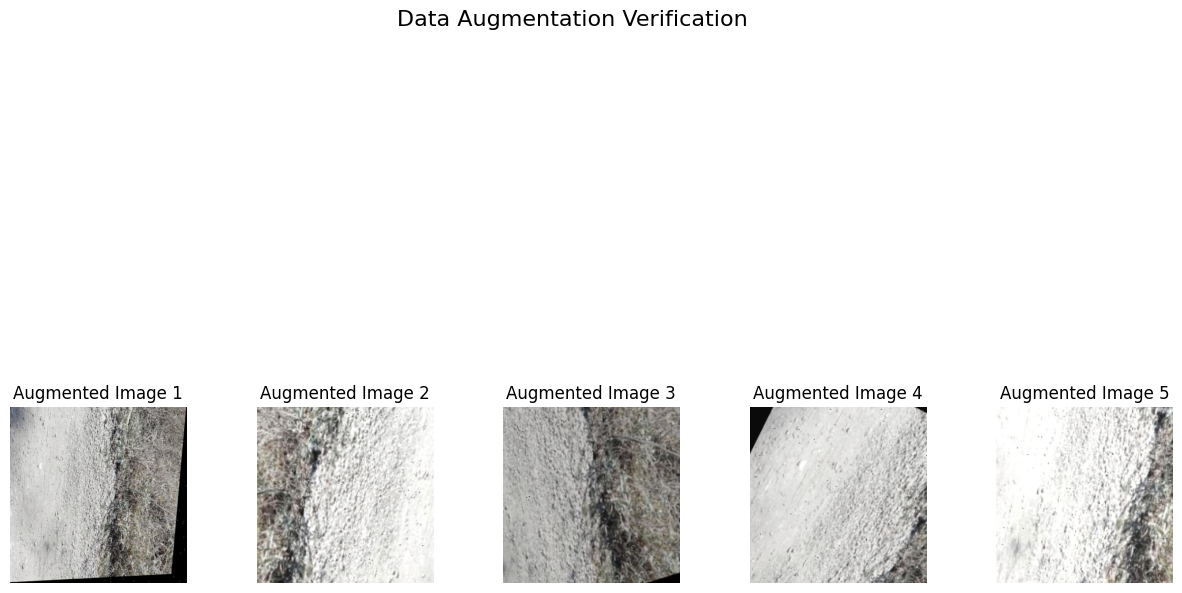

In [16]:
def verify_augmentation(image_path, num_samples=5):
    """Visualize augmented images to verify transformations."""
    original_image = cv2.imread(image_path)
    augmented_images = [original_image]

    for _ in range(num_samples - 1):
        augmented_images.append(augment_image(image_path))

    plt.figure(figsize=(15, 10))
    for idx, img in enumerate(augmented_images):
        plt.subplot(1, num_samples, idx + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.suptitle("Data Augmentation Verification", fontsize=16)

    # Improved visualization: adjust spacing, add titles
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for idx in range(num_samples):
        plt.subplot(1, num_samples, idx + 1)
        plt.title(f"Augmented Image {idx + 1}", fontsize=12)

    plt.show()

verify_augmentation(train_images[0])

Five examples of augmented images are displayed. Each image exhibits variations applied to the original input, likely through transformations such as rotation, scaling, or translation. These transformations enhance diversity within the dataset, which helps improve model generalization and robustness. The visual differences among the augmented images suggest that the augmentation process is functioning correctly.